<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis-(EDA)-Module" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-Module-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA) Module</a></span><ul class="toc-item"><li><span><a href="#Load--Data" data-toc-modified-id="Load--Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load  Data</a></span></li><li><span><a href="#Column-Description" data-toc-modified-id="Column-Description-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Column Description</a></span></li><li><span><a href="#Correlation-Analysis" data-toc-modified-id="Correlation-Analysis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Correlation Analysis</a></span></li><li><span><a href="#Column-Drill-down" data-toc-modified-id="Column-Drill-down-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Column Drill-down</a></span></li><li><span><a href="#Aggregate-Statistics" data-toc-modified-id="Aggregate-Statistics-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Aggregate Statistics</a></span></li></ul></li></ul></div>

# Exploratory Data Analysis (EDA) Module

In [3]:
import os
import sys
import time
import json
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import scipy.stats as stats
sns.set(color_codes=True)
%precision 3
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
import logging
logging.disable(logging.ERROR)

In [5]:
import e3tools.eda_table as et
import e3tools.eda_display_utils as edu
import e3tools.eda_bq_utils as ebu
from importlib import reload

## Load  Data

In [6]:
from plotnine.data import mpg

In [7]:
et.add_category_dtype(mpg, "drv", 
                      ["f", 'r', '4'])

In [8]:
import pandas_profiling
profile = mpg.profile_report(style={'full_width':True})
profile.to_file(output_file="profile_mpg.html")

In [9]:
eb = et.EDATable(mpg)

## Column Description

In [10]:
eb.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,drv_cat
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,f
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,f
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,f
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,f
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,f
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,f
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,f
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,4
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,4
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,4


In [11]:
eb.colinfo()

Total: 234 rows


,DataType,ValueCount,NullCount,ZeroCount,0,1,2
manufacturer,category,15,0,0,audi,audi,audi
model,category,38,0,0,a4,a4,a4
displ,float64,35,0,0,1.8,1.8,2
year,int64,2,0,0,1999,1999,2008
cyl,int64,4,0,0,4,4,4
trans,category,10,0,0,auto(l5),manual(m5),manual(m6)
drv,category,3,0,0,f,f,f
cty,int64,21,0,0,18,21,20
hwy,int64,27,0,0,29,29,31
fl,category,5,0,0,p,p,p


In [12]:
style.use('fivethirtyeight')
eb.desc(outputcol=4, max_bins=10, figsize=(4,4))

"<img src=""data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASAAAAEgCAYAAAAUg66AAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAIc0lEQVR4nO3dT2icdR7H8e%2BEWIStUBvSglWwRY0epMhWijcV0YMJBWHxsGAtiAcPe1o3rbTUXLqwrIeFEhbdyuJhiRS1Hkorin8QKl67IBRF/FOF2sZqk5Y2iZm9FbIHC86TfiZPXq9TE%2Bb59vu7vJknk8x0ut1utwACBtILAKuXAAExAgTECBAQI0BAjAABMQIExAgQECNAQIwAATECBMQIEBAjQECMAAExAgTECBDL4oMPPqiRkZH0GvQ5AQJiBAiIESAa8fXXX9fTTz9dW7durR07dtQXX3xRVVWnT5%2BukZGRmpycrO3bt9czzzxTDz30UL322mtLrn/uuedq3759idUJGkwvwMo3Pz9fzz77bG3ZsqXeeOON%2BvLLL2vv3r1LHvPhhx/W1NRULSws1JEjR%2BrYsWP11FNPVVXVzMxMffzxx3Xo0KHE%2BgQJED07ceJEff/99/X666/XunXr6o477qivvvqqXnrppauP2blzZ23evLmqqsbGxurQoUN15syZ2rhxY7333nu1fv36uv/%2B%2B1NHIMQtGD37/PPP65Zbbql169Zd/d6999675DG33Xbb1X/ffffddeedd9axY8eqquro0aP1%2BOOPV6fTuT4L0zcEiGVxww03LPn6xhtvXPL16OhoHT9%2BvH766af65JNPamxs7HquR58QIHo2MjJS3333XZ07d%2B7q9z777LNfvWZ0dLROnjxZhw8frttvv73uueee5V6TPiRA9OyBBx6oLVu21Pj4eJ06dao%2B%2Buijevnll3/1mk2bNtXWrVtrcnKyRkdHr9Om9BsBomeDg4P1yiuv1ODgYD355JN14MCB2rVr1zWvGxsbq0uXLgnQKtbx0cxAimdAQIwAATECBMQIEBAjQECMAAExffnHqOfPX6zFxfb8dsDQ0Nqanp5Nr9EoZ1oZlvNMAwOduvnm3/U0oy8DtLjYbVWAqqp156lyppWin8/kFgyIESAgRoCAGAECYgQIiPHX8LBKXb4yXzMXLv/m6wcGOjU0tLanHfryZfg//fVInTt/Mb0GtNp//vbHmqnfHqAmuAUDYgQIiBEgIEaAgBgBAmIECIgRICBGgIAYAQJiBAiIESAgRoCAGAECYgQIiBEgIEaAgBgBAmIECIgRICBGgIAYAQJiBAiIESAgRoCAGAECYhoN0IULF%2BrBBx%2BsN998s8mxQEs1GqD9%2B/fXmTNnmhwJtFhjAXrrrbdqdna27rrrrqZGAi3XSIC%2B/fbbOnjwYB04cKCJccAq0XOAfvnll3r%2B%2BedrfHy8hoeHm9gJWCV6DtDk5GRt3ry5Hn300Sb2AVaRwV4HHD16tH744Yd69913q6rq4sWLNTExUSdPnqwXX3yx1/FAi/UcoOPHjy/5eseOHbVz58564okneh0NtJxfRARien4G9P/efvvtpkcCLeUZEBAjQECMAAExAgTECBAQI0BAjAABMQIExAgQECNAQIwAATECBMQIEBAjQECMAAExAgTECBAQI0BAjAABMQIExAgQECNAQIwAATECBMQIEBAjQECMAAExnW63200vAVx/l6/M18yFy7/5%2BoGBTg0Nre1ph8Gerl4m09OztbjYni4OD99UZ8/OpNdolDOtDP1%2BJrdgQIwAATECBMQIEBAjQECMAAExAgTECBAQI0BAjAABMQIExAgQECNAQIwAATHeDwhYYmHuSp3/ee6aj2vt%2BwH995/jNXdhOr0GrEq//8u/quraAWqCWzAgRoCAGAECYgQIiBEgIEaAgBgBAmIECIgRICBGgIAYAQJiBAiIESAgRoCAGAECYgQIiBEgIEaAgBgBAmIECIgRICBGgIAYAQJiBAiIESAgpvEAvfrqq7Vt27bavn17zc7ONj0eaJHGAzQ1NVV79uypTz/9tNau7e1zo4F2azRAjz32WH3zzTc1MTFRu3fvbnI00EKDTQ5755136uGHH64XXnihHnnkkSZHAy3kh9BAjAABMQIExAgQECNAQEyjr4JVVb3//vtNjwRayjMgIEaAgBgBAmIECIgRICBGgIAYAQJiBAiIESAgRoCAGAECYgQIiBEgIEaAgBgBAmIECIgRICBGgIAYAQJiBAiIESAgRoCAGAECYgQIiBEgIEaAgJhOt9vtppcA%2BsfC3JU6//PcNR83MNCpoaG1Pf1fjX82fBOmp2drcbE9XRwevqnOnp1Jr9EoZ1oZ%2Bv1MbsGAGAECYgQIiBEgIEaAgBgBAmIECIgRICBGgIAYAQJiBAiIESAgRoCAGAECYvry7Th6fY%2BRfjO3MJ9eAfpSXwboz4cn6tzsj%2Bk1GvPvXf%2BoqsvpNaDvuAUDYgQIiBEgIEaAgBgBAmIECIgRICBGgIAYAQJiBAiIESAgRoCAGAECYgQIiBEgIEaAgBgBAmIECIgRICBGgIAYAQJiBAiIESAgRoCAGAECYgQIiBEgIEaAgJhGA3T69Om67777au/evbVt27aamppqcjzQMoNND7x06VKtX7%2B%2BTpw4UQsLC02PB1qk8QBVVY2NjdWaNWtqzZo1yzEeaIll%2BRnQhg0blmMs0DLLEqBOp7McY4GW8SoYECNAQEyjP4S%2B9dZb69SpU02OBFrMMyAgRoCAGAECYgQIiBEgIEaAgBgBAmIECIgRICBGgIAYAQJiBAiIESAgRoCAGAECYgQIiBEgIEaAgBgBAmIECIgRICBGgIAYAQJiBAiIESAgRoCAmEY/mrkpf//D/vQKjZpbmE%2BvAH2pLwM0PT1bi4vd9BqNGR6%2Bqaoup9eAvuMWDIgRICBGgIAYAQJiBAiI6ctXwQYGOukVGudMK4MzXd%2B5nW63257Xu4EVxS0YECNAQIwAATECBMQIEBAjQECMAAExAgTECBAQI0BAjAABMQIExAgQECNAQIwAATH/Azq7h/ew8j5BAAAAAElFTkSuQmCC"">"
"<img src=""data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASAAAAEgCAYAAAAUg66AAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAJrElEQVR4nO3dX4hWdRrA8WcmNWjfaHSYMXGC7hT8g7JToRTiIBQbRdhGRBRpBFtdBIusIMG2xBbb2sIGwmbCygaWjDQXyQZBWBDThUKBgQhdmTMwOK%2BljdpMrzN7s6vIBgXv7/U5nfl87jy8PPNwLr6c83o4b9fc3NxcACTozl4AmL8ECEgjQEAaAQLSCBCQRoCANAIEpBEgII0AAWkECEgjQEAaAQLSCBCQRoCANAIEpBEgOurYsWOxZcuWWLNmTaxYsSKOHDmSvRIVIkB01J49e%2BL222%2BPDz74IHsVKkiA6Kjz58/H2rVrY2BgIHsVKmhB9gLU19DQUIyNjcWXX34Ze/bsyV6HCnIFRMccOnQoVq5cGdu3b49PP/00ex0qSIDomCVLlsQNN9wQN910U/T19WWvQwUJEJBGgIA0AgSkESAgjQABabr8NDOQxRUQkEaAgDQCBKQRICCNAAFpBAhIU8nXcXzzzYWYnfV0QG9vI5rNqew1KsG5uKoq56K7uysWL/5VWzMqGaDZ2TkB%2Bi/n4Srn4qq6nAu3YECaSgao0bg

<Figure size 288x288 with 0 Axes>

In [13]:
eb.desc_detail(['drv', 'displ'], proportiontocut=0.2);

<Figure size 360x360 with 0 Axes>

## Correlation Analysis

In [14]:
eb.corr()

,displ,year,cyl,cty,hwy
displ,1,0.152,0.941,-0.881,-0.827
year,0.152,1,0.119,-0.007,0.04
cyl,0.941,0.119,1,-0.867,-0.793
cty,-0.881,-0.007,-0.867,1,0.954
hwy,-0.827,0.04,-0.793,0.954,1


,year,cyl,cty,hwy
cty,-0.006856,-0.866962,1.0,0.95421


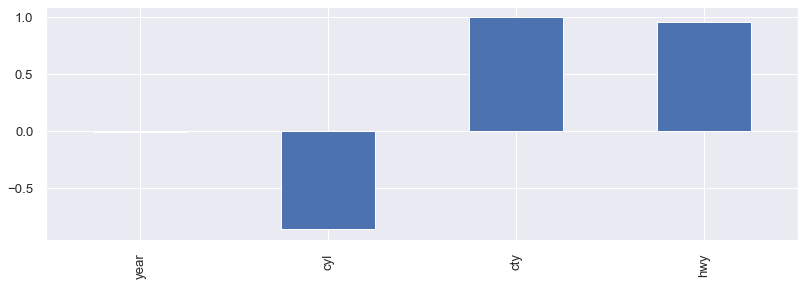

In [15]:
eb.corr_with('cty')

In [ ]:
# eb.pairplot(["displ","year", "trans"], ["cyl", "cty", 'class'], figsize=(5,5))

## Column Drill-down

You can also divide the table into sub-groups and run the same analysis as below

In [17]:
eb.desc_group("class", ['displ','cty','hwy'], min_count=25)

<Figure size 360x360 with 0 Axes>

In [18]:
# for e in eb.groupby("class"):
#     e.corr()

## Aggregate Statistics

In [19]:
mpg['displ_large'] = mpg.displ.apply(lambda e: True if e > 4.5 else False)
FACETS = ['year', 'class', 'displ_large']
METRICS = ['cty', 'hwy']
ea = edu.agg_dataframe(mpg, FACETS, METRICS)
ea

,year,class,displ_large,sample_size,cty_avg,cty_sum,cty_ssq,cty_ci95,hwy_avg,hwy_sum,hwy_ssq,hwy_ci95
0,1999,2seater,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1999,2seater,True,2.0,15.500000,31.0,481.0,0.979982,24.500000,49.0,1205.0,2.939946
2,1999,compact,False,25.0,19.760000,494.0,10126.0,1.527766,27.920000,698.0,19942.0,1.704605
3,1999,compact,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1999,midsize,False,20.0,18.150000,363.0,6635.0,0.685987,26.500000,530.0,14076.0,0.559805
5,1999,midsize,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1999,minivan,False,6.0,16.166667,97.0,1575.0,0.935414,22.500000,135.0,3045.0,0.979982
7,1999,minivan,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1999,pickup,False,8.0,14.500000,116.0,1688.0,0.641549,18.000000,144.0,2606.0,0.979982
9,1999,pickup,True,8.0,11.500000,92.0,1064.0,0.641549,15.625000,125.0,1957.0,0.515573


In [20]:
pd.pivot_table(ea, index='displ_large', columns='class', values='sample_size', aggfunc=np.sum)

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
displ_large,,,,,,,
False,0.0,47.0,40.0,11.0,13.0,30.0,27.0
True,5.0,0.0,1.0,0.0,20.0,5.0,35.0


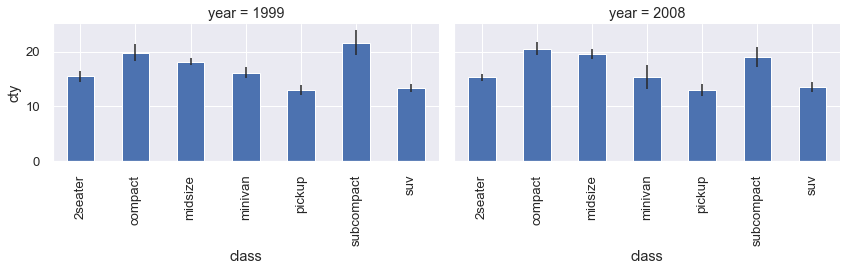

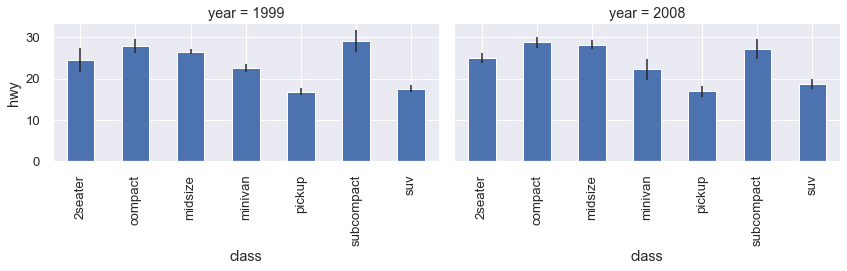

In [21]:
for m in ['cty', 'hwy']:
    g = sns.FacetGrid(ea, col='year', height=4, aspect=1.5)
    g.map_dataframe(edu.plot_facet_measure, "class", m, kind='bar')

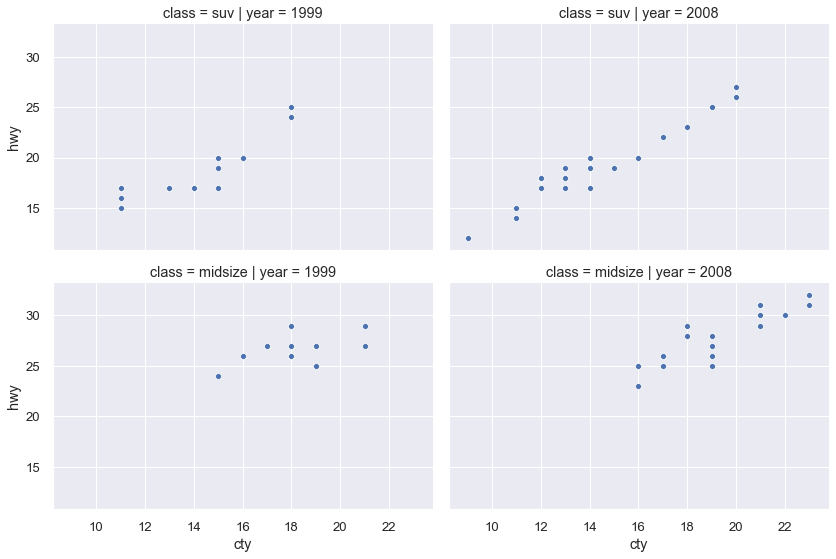

In [22]:
g = sns.FacetGrid(mpg, col='year', row='class', row_order=['suv', 'midsize'], height=4, aspect=1.5)
g.map_dataframe(sns.scatterplot, "cty", 'hwy')